In [2]:
# !pip install sklearn

    100% |████████████████████████████████| 4.9MB 2.0MB/s ta 0:00:01


## Fitting a Linear Regression

In [3]:
import numpy, pandas as pd
import matplotlib, matplotlib.pyplot as plt 
import sklearn.linear_model as lm

# Get the data
sap = pd.read_csv("sapXXI.csv").set_index("Date")

In [4]:
sap.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-12-31,1475.250000,1475.829956,1465.130005,1468.359985,1468.359985,2440880000
2008-01-02,1467.969971,1471.770020,1442.069946,1447.160034,1447.160034,3452650000
2008-01-03,1447.550049,1456.800049,1443.729980,1447.160034,1447.160034,3429500000
2008-01-04,1444.010010,1444.010010,1411.189941,1411.630005,1411.630005,4166000000
2008-01-07,1414.069946,1423.869995,1403.449951,1416.180054,1416.180054,4221260000


In [ ]:
# Select a "linearly looking" part
# sap.index = pd.to_datetime(sap.index)
# sap_linear = sap.loc[sap.index > pd.to_datetime('2009-01-01')]
sap_linear = sap.copy()
xord = [x.toordinal() for x in sap_linear.index]
print("xord={}".format(xord[:10]))
print("numpy.newaxis={}".format(numpy.newaxis))

In [29]:
X_array = numpy.array(xord)
print("X_array={}".format(X_array))

# https://stackoverflow.com/questions/29241056/how-does-numpy-newaxis-work-and-when-to-use-it
X = X_array[:, numpy.newaxis] 

print("X={}".format(X))

y = sap_linear['Close']

X_array=[733041 733043 733044 ... 736944 736947 736948]
X=[[733041]
 [733043]
 [733044]
 ...
 [736944]
 [736947]
 [736948]]


In [30]:

# Prepare the model and fit it
olm = lm.LinearRegression()
olm.fit(X, y)

# Predict values
yp = [olm.predict(x.toordinal())[0] for x in sap_linear.index] # Evaluate the model
olm_score = olm.score(X, y)
olm_score

0.894753848963351

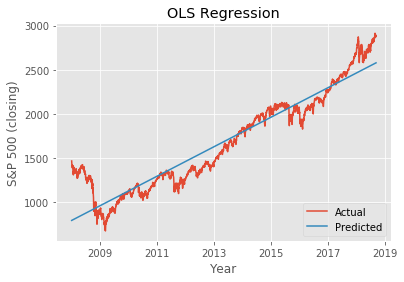

In [16]:
# Select a nice plotting style
matplotlib.style.use("ggplot")

# Plot both data sets
plt.plot(sap_linear.index, y)
plt.plot(sap_linear.index, yp)

# Add decorations
plt.title("OLS Regression")
plt.xlabel("Year")
plt.ylabel("S&P 500 (closing)")
plt.legend(["Actual", "Predicted"], loc="lower right") 
# plt.annotate("Score=%.3f" % olm_score, xy=(pd.to_datetime('2010-06-01'), 1900)) 
# plt.savefig("../images/sap-linregr.pdf")

## Ridge Regression

In [31]:
regr = lm.Ridge(alpha=.5) 
regr.fit(X, y)

yp = [regr.predict(x.toordinal())[0] for x in sap_linear.index] # Evaluate the model
regr.score(X, y)


0.8947538489633513

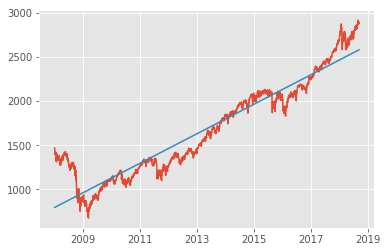

In [32]:
# Plot both data sets
plt.plot(sap_linear.index, y)
plt.plot(sap_linear.index, yp)


## Logit Regression

In [37]:
import pandas as pd
from sklearn.metrics import confusion_matrix 
import sklearn.linear_model as lm

# Initialize the regression tool
clf = lm.LogisticRegression(C=10.0)

# Read the data sheet, quantize letter grades
grades = pd.read_table("grades.csv")
grades.head()

,Final score,Quiz 1,Quiz 2,Quiz 3,Quiz 4,Quiz 5,Quiz 6,Quiz 8.1,Quiz 8.2,Quiz 9.1,Quiz 9.2,Quiz 10.1,Quiz 10.2,Final exam
0,88.85,34.5,45.0,46.2,37.0,37.25,36.25,9.5,26.0,11.00000,26.50,11.0,16.02,266.66666
1,74.05,29.5,12.0,21.0,11.0,7.50,32.00,11.0,28.5,10.33333,21.50,10.0,15.48,212.66667
2,63.05,28.3,23.0,3.0,10.0,24.00,30.00,8.5,30.0,6.33333,0.00,12.0,12.96,187.50000
3,96.49,40.0,49.0,45.9,40.0,39.95,39.00,9.5,31.0,11.00000,26.50,10.0,13.37,277.50000
4,81.72,40.0,48.5,45.0,35.0,34.50,34.80,10.5,32.0,11.00000,20.15,11.0,12.42,154.33333


In [39]:
labels = ('F', 'D', 'C', 'B', 'A')
grades["Letter"] = pd.cut(grades["Final score"], [0, 60, 70, 80, 90, 100], labels=labels) 
grades.head()

,Final score,Quiz 1,Quiz 2,Quiz 3,Quiz 4,Quiz 5,Quiz 6,Quiz 8.1,Quiz 8.2,Quiz 9.1,Quiz 9.2,Quiz 10.1,Quiz 10.2,Final exam,Letter
0,88.85,34.5,45.0,46.2,37.0,37.25,36.25,9.5,26.0,11.00000,26.50,11.0,16.02,266.66666,B
1,74.05,29.5,12.0,21.0,11.0,7.50,32.00,11.0,28.5,10.33333,21.50,10.0,15.48,212.66667,C
2,63.05,28.3,23.0,3.0,10.0,24.00,30.00,8.5,30.0,6.33333,0.00,12.0,12.96,187.50000,D
3,96.49,40.0,49.0,45.9,40.0,39.95,39.00,9.5,31.0,11.00000,26.50,10.0,13.37,277.50000,A
4,81.72,40.0,48.5,45.0,35.0,34.50,34.80,10.5,32.0,11.00000,20.15,11.0,12.42,154.33333,B


In [36]:
X = grades[["Quiz 1", "Quiz 2"]]

# Fit the model, display the score and the confusion matrix
clf.fit(X, grades["Letter"])
print("Score=%.3f" % clf.score(X, grades["Letter"]))
cm = confusion_matrix(clf.predict(X), grades["Letter"])

print(pd.DataFrame(cm, columns=labels, index=labels))

Score=0.535
   F   D  C  B  A
F  0   0  0  0  0
D  2  16  6  4  1
C  0   1  6  2  2
B  0   0  0  1  2
A  0   0  0  0  0


## Grouping Data With K-Means Clustering

In [62]:
import matplotlib, matplotlib.pyplot as plt 
import pickle, pandas as pd
import sklearn.cluster, sklearn.preprocessing

# The NIAAA frame has been pickled before
# alco2009 = pickle.load(open("alco2009.pickle", "rb")) # States" abbreviations
alco = pd.read_csv("alco2009.csv").fillna(method='ffill').reset_index().set_index(['State','Year']).drop(['index'], axis=1)
alco.head()

Beer  Wine  Spirits
State   Year                     
Alabama 2009  1.20  0.22     0.58
        2008  1.24  0.22     0.58
        2007  1.24  0.22     0.56
        2006  1.22  0.21     0.55
        2005  1.18  0.20     0.53

In [78]:
# alco2009 = alco.groupby("State").sum()
# alco2009 = alco.sum()
# alco2009 = alco.reset_index(level=[1]).filter(items=[2009],axis=0)
level_years = alco.index.get_level_values('Year')
print("level_years={}".format(level_years))

level_years_index = level_years.isin([2009])
print("level_years_index={}".format(level_years_index))

alco2009 = alco[level_years_index]
alco2009 = alco2009.reset_index(level=[1])
alco2009.head()

level_years=Int64Index([2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000,
            ...
            1986, 1985, 1984, 1983, 1982, 1981, 1980, 1979, 1978, 1977],
           dtype='int64', name='Year', length=1683)
level_years_index=[ True False False ... False False False]


,Year,Beer,Wine,Spirits
State,,,,
Alabama,2009,1.20,0.22,0.58
Alaska,2009,1.31,0.54,1.16
Arizona,2009,1.19,0.38,0.74
Arkansas,2009,1.07,0.17,0.60
California,2009,1.05,0.55,0.73


In [79]:
states = pd.read_csv("states.csv", names=("State", "Standard", "Postal", "Capital")) 
states.head()


,State,Standard,Postal,Capital
0,State,Standard,Postal,Capital
1,Alabama,Ala.,AL,Montgomery
2,Alaska,Alaska,AK,Juneau
3,Arizona,Ariz.,AZ,Phoenix
4,Arkansas,Ark.,AR,Little Rock


In [80]:
columns = ["Wine", "Beer"]

# Initialize the clustering object, fit the model
kmeans = sklearn.cluster.KMeans(n_clusters=9) 
kmeans.fit(alco2009[columns])

alco2009["Clusters"] = kmeans.labels_
centers = pd.DataFrame(kmeans.cluster_centers_, columns=columns)
centers

,Wine,Beer
0,0.188889,1.133333
1,0.523750,0.993750
2,0.236667,1.449167
3,0.515000,1.615000
4,0.528571,1.284286
5,0.960000,1.155000
6,0.170000,0.700000
7,0.355556,1.192222
8,0.840000,1.720000


/home/chris/.local/lib/python3.5/site-packages/ipykernel_launcher.py:13: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  del sys.path[0]


Alabama                 None
Alaska                  None
Arizona                 None
Arkansas                None
California              None
Colorado                None
Connecticut             None
Delaware                None
District of Columbia    None
Florida                 None
Georgia                 None
Hawaii                  None
Idaho                   None
Illinois                None
Indiana                 None
Iowa                    None
Kansas                  None
Kentucky                None
Louisiana               None
Maine                   None
Maryland                None
Massachusetts           None
Michigan                None
Minnesota               None
Mississippi             None
Missouri                None
Montana                 None
Nebraska                None
Nevada                  None
New Hampshire           None
New Jersey              None
New Mexico              None
New York                None
North Carolina          None
North Dakota  

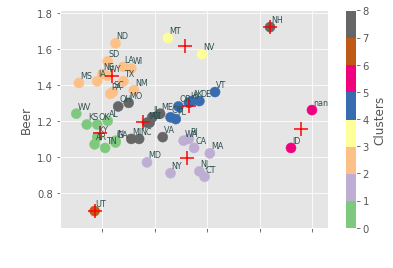

In [81]:
# Select a good-looking style
matplotlib.style.use("ggplot")

# Plot the states and cluster centroids
ax = alco2009.plot.scatter(columns[0], columns[1], c="Clusters", cmap=plt.cm.Accent, s=100)
centers.plot.scatter(columns[0], columns[1], color="red", marker="+", s=200, ax=ax)

# Add state abbreviations as annotations
def add_abbr(state):
    _ = ax.annotate(state["Postal"], state[columns], xytext=(1, 5), 
                    textcoords="offset points", size=8, color="darkslategrey")
    
alco2009withStates = pd.concat([alco2009, states.set_index("State")], axis=1)
alco2009withStates.apply(add_abbr, axis=1)

# Add the title, save the plot
# plt.title("US States Clustered by Alcohol Consumption") plt.savefig("../images/clusters.pdf")

## Random Decision Forest

In [86]:
from sklearn.ensemble import RandomForestRegressor 
import pandas as pd, numpy.random as rnd
import matplotlib, matplotlib.pyplot as plt

# Read the data, prepare two random complementary data sets
hed = pd.read_csv('Hedonic.csv')
selection = rnd.binomial(1, 0.7, size=len(hed)).astype(bool) 
training = hed[selection]
testing = hed[~selection]

# Create a regressor and predictor sets
rfr = RandomForestRegressor()
predictors_tra = training.loc[:, "crim" : "lstat"] 
predictors_tst = testing.loc[:, "crim" : "lstat"]

# Fit the model
feature = "mv"
rfr.fit(predictors_tra, training[feature])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

Text(0,0.5,'Predicted value')

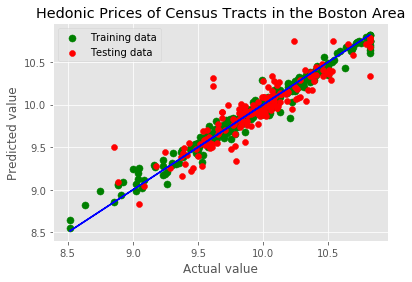

In [87]:
# Select a good-locking style
matplotlib.style.use("ggplot")

# Plot the prediction results
plt.scatter(training[feature], rfr.predict(predictors_tra), c="green", s=50)
plt.scatter(testing[feature], rfr.predict(predictors_tst), c="red") 
plt.legend(["Training data", "Testing data"], loc="upper left") 
plt.plot(training[feature], training[feature], c="blue") 
plt.title("Hedonic Prices of Census Tracts in the Boston Area") 
plt.xlabel("Actual value")
plt.ylabel("Predicted value") 
# plt.savefig("../images/rfr.pdf")